1. There is no information on the time required to reach the target, which would be useful to get a sense of how efficient the animals are.

In [1]:
import cv2
import pandas as pd
import os
import glob
import random
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from scipy.ndimage import gaussian_filter1d

In [2]:
path_data = '../../DATA/1T/trajectories/1t_trajectories_data.pickle'
data = pd.read_pickle(path_data)
data

,inside_food_circle,inside_plume,animal,subdir,condition,inBox,mex,mey,lex,ley,...,shells_heights,shifted_heading_offset_angles,closest_peaks,distance_to_closest_peaks,convex_hull_coordinates,within_plume_list,within_fast_aligned_motion_box,within_fast_aligned_motion_box_idxs,in_plume_distances_to_closest_peaks,in_plume_speed_zscores
0,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...",khorne,../../DATA/1T/trajectories\khorne\Food_not_eat...,Food_not_eaten,"[True, True, True, True, True, True, True, Tru...","[867.7782321352277, 868.4098868720093, 869.103...","[220.3760096390972, 222.62254504851472, 224.94...","[859.7916990734894, 860.442156655386, 861.1662...","[218.44241288276504, 220.4394524234994, 222.58...",...,"[[92.0, 205.3, 242.45, 168.35, 255.0, 80.45, 1...","[8.142816227815567, 8.879178515277461, 9.65239...","[8, 8, 8, 8, 17, 17, 17, 16, 16, 16, 16, 28, 2...","[0.14281622781556713, 0.8791785152774612, 1.65...","[[[[362 214]], [[364 215]], [[368 219]], [[384...","[257, 258, 259, 260, 261, 262, 263, 264, 265, ...","[False, False, False, False, False, False, Fal...","[268, 269, 270, 271, 272, 273, 319, 320, 321, ...","[-0.6879697255377435, 0.9062786569145569, -3.0...","[0.890045616091114, 1.0183667207415892, 1.2084..."
1,"[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",khorne,../../DATA/1T/trajectories\khorne\No_food_Cont...,No_food_Control,"[True, True, True, True, True, True, True, Tru...","[401.3909255130658, 403.8310148211872, 406.165...","[440.34594049593426, 440.4824909345147, 440.96...","[408.7892003231359, 411.0060588383548, 413.219...","[436.9547971787284, 436.8070729969831, 437.059...",...,"[[192.0, 255.0], [242.8, 255.0], [155.85, 255....","[67.2699226859054, 64.20685565090004, 62.07784...","[58, 57, 57, 57, 57, 57, 56, 56, 55, 55, 54, 5...","[9.2699226859054, 7.206855650900039, 5.0778413...","[[[[364 311]], [[345 361]], [[344 363]], [[343...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[False, False, False, False, False, False, Fal...",[],"[9.2699226859054, 7.206855650900039, 5.0778413...","[0.5323052922880918, 0.5026065553112394, 0.496..."
2,"[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",khorne,../../DATA/1T/trajectories\khorne\No_food_Cont...,No_food_Control,"[True, True, True, True, True, True, True, Tru...","[657.559289183019, 658.3439227389397, 659.9528...","[962.4270136912726, 957.2867360210096, 950.986...","[649.7691473232626, 650.6390723674978, 652.283...","[965.5508825641546, 960.0525758525707, 953.351...",...,"[[255.0, 116.55, 255.0, 129.7, 141.85, 28.0, 2...","[41.51949998786321, 40.5354605733971, 40.44219...","[42, 37, 38, 38, 34, 33, 33, 33, 32, 33, 35, 4...","[-0.48050001213678684, 3.5354605733971027, 2.4...","[[[[402 101]], [[404 102]], [[405 103]], [[422...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[True, False, True, True, False, False, False,...","[0, 2, 3, 104, 107, 218, 219, 220, 221, 222, 2...","[-0.48050001213678684, 3.5354605733971027, 2.4...","[1.9129923731451706, 2.5656317767274475, 2.964..."
3,"[False, False, False, False, False, False, Fal...","[True, True, True, True, True, True, True, Tru...",khorne,../../DATA/1T/trajectories\khorne\No_food_Cont...,No_food_Control,"[True, True, True, True, True, True, True, Tru...","[559.7323709455363, 563.1621348289987, 565.898...","[964.6595078906078, 963.7740012767802, 963.078...","[559.3690616385084, 562.5784141925504, 565.259...","[955.8815683918298, 954.8029135622764, 953.953...",...,"[[255.0, 255.0, 117.1, 131.7, 255.0], [255.0, ...","[53.36294444206656, 52.925724130640376, 52.644...","[56, 52, 56, 57, 56, 56, 56, 56, 43, 43, 42, 4...","[-2.6370555579334365, 0.9257241306403756, -3.3...","[[[[300 256]], [[330 272]], [[359 306]], [[362...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[False, False, False, False, False, False, Fal...","[353, 354, 355, 3

In [95]:
plot_dir = '../../PLOTS/response_to_reviewers'
if os.path.exists(plot_dir) != True:
    os.makedirs(plot_dir)

In [3]:
animals = ['khorne', 'kratos', 'larsson', 'ninja', 'korra']

100%|██████████| 271/271 [00:00<00:00, 1631.02it/s]


Food_not_eaten ../../DATA/1T/trajectories\khorne\Food_not_eaten\0 155 155
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\0 251 251
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\1 336 336
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\10 609 609
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\11 379 379
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\12 365 365
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\13 0 0
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\14 221 221
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\15 585 585
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\16 383 383
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\17 339 339
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\18 330 330
No_food_Control ../../DATA/1T/trajectories\khorne\No_food_Control\19 0 0
No_food_Cont

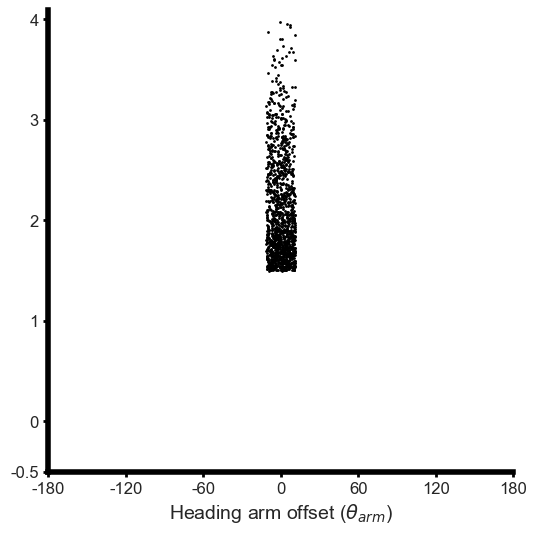

In [4]:
color_key = {'Food_eaten': '#D81B60',
                'Food_not_eaten': '#1E88E5',
               'No_food_Control': '#004D40'}

xticks = [-48, -32, -16, 0, 16, 32, 48]
xticklabels =[-180, -120, -60, 0, 60, 120, 180]

## high speed low offset trajs bounds
offset_bounds = [-3,3]
speed_bounds = [1.5,4]

def test_if_values_within_bounds (v0, v1, b0, b1):
    """
    v0 : float
    v1 : float
    b0 : list with 2 values, [min, max]
    b1 : list with 2 values, [min, max]
    """

    if (v0>=b0[0]) and (v0<=b0[1]) and (v1>=b1[0]) and (v1<=b1[1]):
        return True
    else:
        return False

distances_to_closest_peaks = []
speed_zscores = []

in_plume_distances_to_closest_peaks = []
in_plume_speed_zscores = []

withins_list = []
within_idxs_list = []
withins_plume_list = []

zmax = 4
zmin = -.5
yticks = [zmin, 0, 1, 2, 3, zmax]

pbar = tqdm(total=len(data), position=0, leave=True)
for i, row in enumerate(data.iloc[0:].iterrows()):

    tmptmp = row[1]
    app_idxs = tmptmp['final_approach_indexes']
    inPlume = tmptmp['inside_plume']
    inFood = tmptmp['inside_food_circle']

    ## get indexes where inPlume == True and inFood == False
    testIdxs = np.where((inPlume==True) & (inFood==False))[0]
    ## if there is a jump in the indexes, drop all indexes after the jump
    if np.any(np.diff(testIdxs) > 1):
        testIdxs = testIdxs[:np.where(np.diff(testIdxs) > 1)[0][0]+1]
    withins_plume_list.append(testIdxs)

    distance_to_closest_peaks = np.array(tmptmp['distance_to_closest_peaks'])[testIdxs[:-1]]
    speed_zscore = tmptmp['zscore_speed'][testIdxs[:-1]]

    in_plume_distances_to_closest_peaks.append(distance_to_closest_peaks.copy())
    in_plume_speed_zscores.append(speed_zscore.copy())

    ## get row indexes where distance_to_closest_peaks and speed_zscore are within bounds
    withins = []
    for i, (pk, sp) in enumerate(zip(distance_to_closest_peaks, speed_zscore)):
        within = test_if_values_within_bounds(pk, sp, offset_bounds, speed_bounds)
        withins.append(within)
    withins = np.array(withins)

    withins_list.append(withins)

    print(tmptmp['condition'], tmptmp['subdir'], len(withins), len(distance_to_closest_peaks))

    idxs_within = []
    for within, idx in zip(withins, testIdxs[:-1]):
        if within == True:
            idxs_within.append(idx)
    within_idxs_list.append(idxs_within)

    distance_to_closest_peaks = np.array(distance_to_closest_peaks)[withins == True]
    speed_zscore = np.array(speed_zscore)[withins == True]

    distances_to_closest_peaks = np.concatenate((distances_to_closest_peaks, distance_to_closest_peaks))
    speed_zscores = np.concatenate((speed_zscores, speed_zscore))

    pbar.update(1)
pbar.close()

fig, ax = plt.subplots(1,1,figsize=(6,6))

ax.scatter(distances_to_closest_peaks, speed_zscores, s=1, color='black', alpha=1)

ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=12)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, fontsize=12)


ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(4)
    ax.spines[axis].set_color('black')

ax.set_xlabel(r'Heading arm offset ($\theta_{arm}$)', fontsize=14)

plt.show(fig)
plt.close(fig)

data['within_plume_list'] = withins_plume_list
data['within_fast_aligned_motion_box'] = withins_list
data['within_fast_aligned_motion_box_idxs'] = within_idxs_list
data['in_plume_distances_to_closest_peaks'] = in_plume_distances_to_closest_peaks
data['in_plume_speed_zscores'] = in_plume_speed_zscores

In [9]:
print(data['condition'].unique())

['Food_not_eaten' 'No_food_Control' 'Food_eaten']


100%|██████████| 271/271 [00:00<00:00, 466.36it/s]


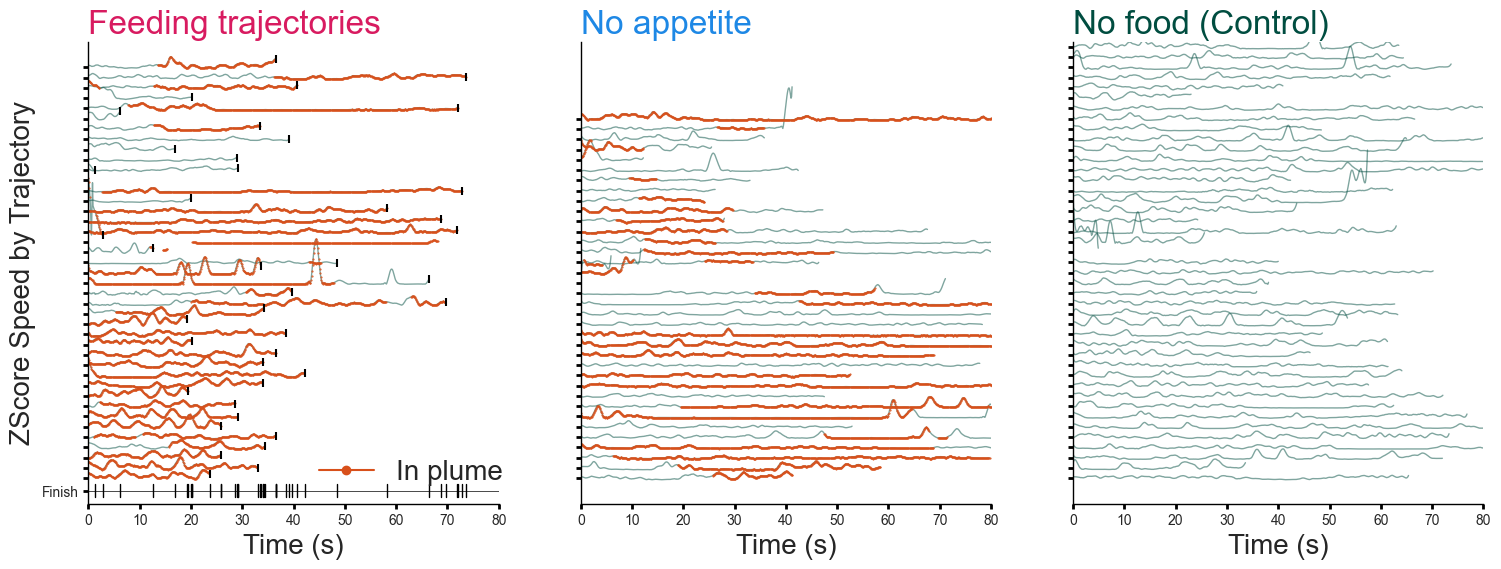

In [105]:
titles = ['Feeding trajectories', 'No appetite', 'No food (Control)']

fig, axs = plt.subplots(1,3,figsize=(18,6))

xticks = np.arange(0, 1100, 100)
xlabels = [str(int(round(xtick/10,0))) for xtick in xticks]

pbar = tqdm(total = len(data), position = 0, leave=True)
for i, condition in enumerate(['Food_eaten', 'Food_not_eaten', 'No_food_Control']):
    ax = axs[i]
    tmp = data[data['condition'] == condition]

    j = 0
    yticks = []
    for _, row in tmp.iterrows():
        zscore_speed = row['zscore_speed']
        nzf = np.arange(0, len(zscore_speed))
        if len(zscore_speed) == 0:
            continue

        inside_plume = row['inside_plume']
        inside_food_circle = row['inside_food_circle']
        in_plume_zscore_speed = zscore_speed[(inside_plume == True) & (inside_food_circle == False)]
        in_plume_nzf = nzf[(inside_plume == True) & (inside_food_circle == False)]

        crossing_index = None
        if condition == 'Food_eaten':
            crossing_index = next((i for i, val in enumerate(inside_food_circle) if val), None)
            if crossing_index is not None:
                ax.plot([crossing_index, crossing_index], [-2.5, -7.5], color='black', linewidth=1)

                ax.scatter(crossing_index, zscore_speed[crossing_index] + j, color='black', s=40, zorder=3, marker="|")

        #ax.plot([nzf[0], nzf[-1]], [j,j], color='black', alpha=0.5, linewidth=0.5, zorder=0)
        if crossing_index is not None:
            ax.plot(nzf[:crossing_index], zscore_speed[:crossing_index] + j, color='#004D40', alpha=0.5, linewidth=1, zorder=1)
        else:
            ax.plot(nzf[:], zscore_speed[:] + j, color='#004D40', alpha=0.5, linewidth=1, zorder=1)

        if condition != 'No_food_Control':
            ax.scatter(in_plume_nzf, in_plume_zscore_speed+ j, color='#D8501B', s=0.25, zorder=2)

        yticks.append(j)
        j += 4
        pbar.update(n=1)

    ax.set_title(titles[i], loc='left', color=color_key[condition], fontsize=24)

    if i == 0:
        yticks.append(-5)

    ax.set_yticks(yticks)
    ylabels = ['' for ytick in yticks]

    if i == 0:
        ylabels[-1] = 'Finish'

    ax.set_yticklabels(ylabels)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)

    ax.set_ylim(-10, 170)
    ax.set_xlim(0,800)

for ax in axs:
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, color='black', width=2)
    ax.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, color='black', width=2)

    ax.set_xlabel('Time (s)', fontsize=20)

    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1)
        ax.spines[axis].set_color('black')

axs[0].set_ylabel('ZScore Speed by Trajectory', fontsize=20)
axs[0].axhline(y=-5, linewidth=0.5, color='black')

custom_lines = [Line2D([0], [0], color='#D8501B', marker='o', markerfacecolor='#D8501B', label='In plume', linewidth=None)]
custom_labels = ['In plume']
axs[0].legend(custom_lines, custom_labels, loc='upper left', frameon=False, fontsize=20, bbox_to_anchor=(0.5,0.15))

pbar.close()

path_fig = os.path.join(plot_dir, 'trajectory_speeds.png')
fig.savefig(path_fig, dpi=300, bbox_inches='tight')

plt.show(fig)
plt.close(fig)

